![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 3. Modelamiento

Una vez preparados los datos, se procederá con el modelamiento. Recuerden que el objetivo es clasificar a un paciente como hospitalizado o no hospitalizado, teniendo en cuenta un data set que contiene información referente a antecedentes del paciente, morbilidad asociada al paciente y antecedentes relacionados con la toma de la biopsia y complicaciones infecciosas.




Carguen la base de datos preparada desde la fase 2.

In [17]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
from imblearn.over_sampling import SMOTE

In [7]:
df = pd.read_csv("BBDD_hospitalizacion_codificado.csv")
df

,Edad,Diabetes,PSA,Biopsias_previas,Vol_prostatico,Antibiotico_profilaxis,Num_muestras,Enf_cronica_pulm_obstructiva,Biopsia,Fiebre,ITU,Hospitalizacion
0,53,0,4.0,0,1,0,12,0,0,1,0,1
1,56,0,7.7,0,1,0,12,0,0,1,0,1
2,57,0,29.0,1,1,0,24,0,0,1,0,1
3,56,0,7.0,0,1,0,12,0,0,1,0,1
4,55,0,29.0,1,1,0,24,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
426,55,0,5.0,0,0,0,12,0,2,0,0,0
427,70,1,18.0,0,1,0,12,0,0,0,0,0
428,75,0,75.0,0,1,0,12,0,5,0,0,0
429,67,0,6.0,0,1,0,12,0,1,0,0,0


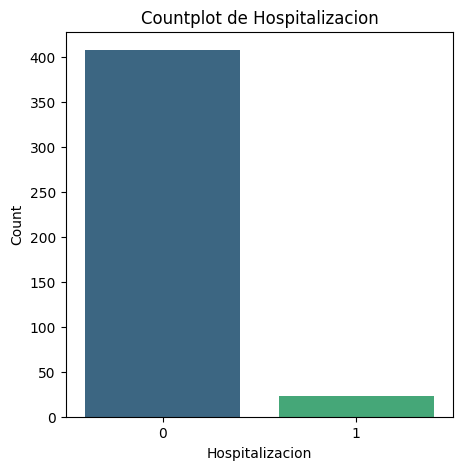

Hospitalizacion
0    408
1     23
Name: count, dtype: int64


In [16]:
plt.figure(figsize=(5,5))
sns.countplot(x="Hospitalizacion", data=df, palette="viridis")
plt.xlabel('Hospitalizacion')
plt.ylabel('Count')
plt.title('Countplot de Hospitalizacion')
plt.show()

print(df["Hospitalizacion"].value_counts())

La variable objetivo muestra un considerable desequilibrio entre las clases, con tan solo 23 registros pertenecientes a la clase positiva para la hospitalización.<br>
La idea es abordar el desequilibrio de clases durante el entrenamiento del modelo sin tocar el conjunto de prueba. La razón detrás de esto es asegurarse de que la evaluación del rendimiento del modelo en el conjunto de prueba sea una representación más realista de cómo se comportaría en datos no vistos.<br>
El proceso sería:
* Aplicar SMOTE solo al conjunto de entrenamiento, generando instancias sintéticas para equilibrar las clases.
* Entrenar el modelo con el conjunto de entrenamiento aumentado por SMOTE.
* Evaluar el rendimiento del modelo en el conjunto de prueba, que no ha sido modificado por SMOTE.

Separamos el dataset en X, y (variable objetivo)

In [ ]:
X= df.drop("Hospitalizacion", axis=1)
y= df["Hospitalizacion"]



Separen el dataset en X_train, X_test, y_train y y_test

Instancien, entrenen y predigan sobre un árbol de decisión asignando una profundidad máxima arbitraria

Realicen la matriz de confusión para este modelo. Se recomienda utilizar mapa de calor para la visualización. 

Seleccione tres métricas de evaluación para este modelo de clasificación y describa el significado de cada una de ellas para el modelo creado.

Realice un diagrama de la importancia de cada variable respecto a la clasificación de la variable objetivo

Encuentre cuál sería un valor óptimo para el hiperparámetro **max_depth** para el árbol de decisión. Construya un modelo con este valor y compare las métricas de evaluación respecto al modelo creado con una profundidad arbitraria. 

Instancien, entrenen y predigan sobre un modelo de k-vecinos asignando una cantidad de vecinos k-aribitraria. 

Encuentre el valor óptimo para k

Halle las mismas tres métricas de evaluación para este modelo de clasificación y compare los valores para el performance, respecto al árbol de decisión cuyo hiperparámetro **max_depth** se optimizó. ¿Qué puede concluir? 

De acuerdo con lo aprendido en el módulo, ¿Cómo cree que se puede mejorar el performance de este modelo? 

R/